# WeatherPy by Julia Sweet
----

#### Commentary
* This project yielded interesting information about not only weather patterns but also weather reporting, the distribution of cities across the geocoordinate system, and limitations of focusing on city data when attempting to draw conclusions about global weather patterns. See analysis in markdown cells. 

In [30]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import datetime
import time


#Set today
today=datetime.datetime.today()
today=today.strftime('%m-%d-%Y')
print(f"Code run today, {today}.")

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy


# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


Code run today, 07-11-2019.


In [31]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

cities_found=len(cities)
success_rate=cities_found/1500

print(f"{cities_found} geocoordinate pairs of 1500 were near cities with populations of 500 or more.")
print("That's a match rate of " + "{:.2%}".format(success_rate))


642 geocoordinate pairs of 1500 were near cities with populations of 500 or more.
That's a match rate of 42.80%


## Analysis 1: 

After running this several times, I noticed that the number of geocoordinate pairs that were near cities was usually around 40% (+/- about 2%). This tells me that much of the world is not near cities with populations of over 500.

In looking at my charts, I can also see that there is typically more data for cities in the northern hemisphere; that tells me that there are typically more cities with populations of over 500 in the northern hemisphere than there are in the southern hemisphere. Additionally, there are fewer points plotted at the upper and lower ends of each chart, which tells me that there are fewer such cities the closer you move to the poles. 

In [32]:
# Create URL
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units="imperial"




In [33]:
#Make empty lists to hold your data.

city_name = []
latitude = []
longitude = []
max_temperature = []
humidity = []
cloudiness = []
wind_speed = []
country=[]
date=[]


#Set record number as 1
record = 1

#Set set as 1
QuerySet = 1 


#Set loop
#Go get some fruit to snack on while this runs; you probably have time. 
#As you know, time flies like an arrow; fruit flies like a banana. 
print("Finding information")

for city in cities:
    try:
        query_url = f"{base_url}appid={api_key}&units={units}&q="
        response=requests.get(query_url+city).json()
        city_name.append(response["name"])
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        max_temperature.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        cityname=response["name"]
        print(f"Processing Record #{record}| City: {cityname}")
        print(f" Source URL: {query_url}&q={city}")
        record = record + 1
        
    except:
        print("Your data is in another city. Nevermind; excelsior!")
    continue

    #Make multiple API calls
    if record == 51:
        sleep(10)
        record = 1
        QuerySet= QuerySet + 1

Finding information
Processing Record #1| City: Yumen
 Source URL: http://api.openweathermap.org/data/2.5/weather?appid=1100f5659b71a57732359722cc46bbd5&units=imperial&q=&q=yumen
Processing Record #2| City: Quisqueya
 Source URL: http://api.openweathermap.org/data/2.5/weather?appid=1100f5659b71a57732359722cc46bbd5&units=imperial&q=&q=quisqueya
Processing Record #3| City: Aklavik
 Source URL: http://api.openweathermap.org/data/2.5/weather?appid=1100f5659b71a57732359722cc46bbd5&units=imperial&q=&q=aklavik
Your data is in another city. Nevermind; excelsior!
Processing Record #4| City: Mar del Plata
 Source URL: http://api.openweathermap.org/data/2.5/weather?appid=1100f5659b71a57732359722cc46bbd5&units=imperial&q=&q=mar del plata
Processing Record #5| City: Busselton
 Source URL: http://api.openweathermap.org/data/2.5/weather?appid=1100f5659b71a57732359722cc46bbd5&units=imperial&q=&q=busselton
Processing Record #6| City: Renqiu
 Source URL: http://api.openweathermap.org/data/2.5/weather?ap

Processing Record #49| City: Melfi
 Source URL: http://api.openweathermap.org/data/2.5/weather?appid=1100f5659b71a57732359722cc46bbd5&units=imperial&q=&q=melfi
Processing Record #50| City: Hammerfest
 Source URL: http://api.openweathermap.org/data/2.5/weather?appid=1100f5659b71a57732359722cc46bbd5&units=imperial&q=&q=hammerfest
Processing Record #51| City: Vardo
 Source URL: http://api.openweathermap.org/data/2.5/weather?appid=1100f5659b71a57732359722cc46bbd5&units=imperial&q=&q=vardo
Processing Record #52| City: Kapaa
 Source URL: http://api.openweathermap.org/data/2.5/weather?appid=1100f5659b71a57732359722cc46bbd5&units=imperial&q=&q=kapaa
Processing Record #53| City: Iskateley
 Source URL: http://api.openweathermap.org/data/2.5/weather?appid=1100f5659b71a57732359722cc46bbd5&units=imperial&q=&q=iskateley
Your data is in another city. Nevermind; excelsior!
Processing Record #54| City: Nalut
 Source URL: http://api.openweathermap.org/data/2.5/weather?appid=1100f5659b71a57732359722cc46b

Processing Record #98| City: Samfya
 Source URL: http://api.openweathermap.org/data/2.5/weather?appid=1100f5659b71a57732359722cc46bbd5&units=imperial&q=&q=samfya
Processing Record #99| City: Tondano
 Source URL: http://api.openweathermap.org/data/2.5/weather?appid=1100f5659b71a57732359722cc46bbd5&units=imperial&q=&q=tondano
Processing Record #100| City: Cidreira
 Source URL: http://api.openweathermap.org/data/2.5/weather?appid=1100f5659b71a57732359722cc46bbd5&units=imperial&q=&q=cidreira
Processing Record #101| City: Marfino
 Source URL: http://api.openweathermap.org/data/2.5/weather?appid=1100f5659b71a57732359722cc46bbd5&units=imperial&q=&q=marfino
Processing Record #102| City: Bethel
 Source URL: http://api.openweathermap.org/data/2.5/weather?appid=1100f5659b71a57732359722cc46bbd5&units=imperial&q=&q=bethel
Your data is in another city. Nevermind; excelsior!
Processing Record #103| City: Loreto
 Source URL: http://api.openweathermap.org/data/2.5/weather?appid=1100f5659b71a57732359722

Processing Record #145| City: Ruteng
 Source URL: http://api.openweathermap.org/data/2.5/weather?appid=1100f5659b71a57732359722cc46bbd5&units=imperial&q=&q=ruteng
Your data is in another city. Nevermind; excelsior!
Processing Record #146| City: Mount Isa
 Source URL: http://api.openweathermap.org/data/2.5/weather?appid=1100f5659b71a57732359722cc46bbd5&units=imperial&q=&q=mount isa
Processing Record #147| City: Springfield
 Source URL: http://api.openweathermap.org/data/2.5/weather?appid=1100f5659b71a57732359722cc46bbd5&units=imperial&q=&q=springfield
Processing Record #148| City: Zhoucun
 Source URL: http://api.openweathermap.org/data/2.5/weather?appid=1100f5659b71a57732359722cc46bbd5&units=imperial&q=&q=zhoucun
Processing Record #149| City: Tallahassee
 Source URL: http://api.openweathermap.org/data/2.5/weather?appid=1100f5659b71a57732359722cc46bbd5&units=imperial&q=&q=tallahassee
Processing Record #150| City: Batagay-Alyta
 Source URL: http://api.openweathermap.org/data/2.5/weather?a

Processing Record #194| City: Peterhead
 Source URL: http://api.openweathermap.org/data/2.5/weather?appid=1100f5659b71a57732359722cc46bbd5&units=imperial&q=&q=peterhead
Your data is in another city. Nevermind; excelsior!
Processing Record #195| City: Ballachulish
 Source URL: http://api.openweathermap.org/data/2.5/weather?appid=1100f5659b71a57732359722cc46bbd5&units=imperial&q=&q=ballachulish
Processing Record #196| City: Yarmouth
 Source URL: http://api.openweathermap.org/data/2.5/weather?appid=1100f5659b71a57732359722cc46bbd5&units=imperial&q=&q=yarmouth
Your data is in another city. Nevermind; excelsior!
Processing Record #197| City: Kisangani
 Source URL: http://api.openweathermap.org/data/2.5/weather?appid=1100f5659b71a57732359722cc46bbd5&units=imperial&q=&q=kisangani
Processing Record #198| City: Aldan
 Source URL: http://api.openweathermap.org/data/2.5/weather?appid=1100f5659b71a57732359722cc46bbd5&units=imperial&q=&q=aldan
Processing Record #199| City: Kattivakkam
 Source URL: 

Processing Record #241| City: Saskylakh
 Source URL: http://api.openweathermap.org/data/2.5/weather?appid=1100f5659b71a57732359722cc46bbd5&units=imperial&q=&q=saskylakh
Processing Record #242| City: Wodonga
 Source URL: http://api.openweathermap.org/data/2.5/weather?appid=1100f5659b71a57732359722cc46bbd5&units=imperial&q=&q=wodonga
Processing Record #243| City: Bo Phloi
 Source URL: http://api.openweathermap.org/data/2.5/weather?appid=1100f5659b71a57732359722cc46bbd5&units=imperial&q=&q=bo phloi
Processing Record #244| City: Labuhan
 Source URL: http://api.openweathermap.org/data/2.5/weather?appid=1100f5659b71a57732359722cc46bbd5&units=imperial&q=&q=labuhan
Processing Record #245| City: Basqal
 Source URL: http://api.openweathermap.org/data/2.5/weather?appid=1100f5659b71a57732359722cc46bbd5&units=imperial&q=&q=basqal
Processing Record #246| City: Vozhega
 Source URL: http://api.openweathermap.org/data/2.5/weather?appid=1100f5659b71a57732359722cc46bbd5&units=imperial&q=&q=vozhega
Proces

Processing Record #290| City: Shingu
 Source URL: http://api.openweathermap.org/data/2.5/weather?appid=1100f5659b71a57732359722cc46bbd5&units=imperial&q=&q=shingu
Processing Record #291| City: College
 Source URL: http://api.openweathermap.org/data/2.5/weather?appid=1100f5659b71a57732359722cc46bbd5&units=imperial&q=&q=college
Processing Record #292| City: Yuzhno-Kurilsk
 Source URL: http://api.openweathermap.org/data/2.5/weather?appid=1100f5659b71a57732359722cc46bbd5&units=imperial&q=&q=yuzhno-kurilsk
Processing Record #293| City: Grand Gaube
 Source URL: http://api.openweathermap.org/data/2.5/weather?appid=1100f5659b71a57732359722cc46bbd5&units=imperial&q=&q=grand gaube
Processing Record #294| City: Rocky Mountain House
 Source URL: http://api.openweathermap.org/data/2.5/weather?appid=1100f5659b71a57732359722cc46bbd5&units=imperial&q=&q=rocky mountain house
Processing Record #295| City: Yurla
 Source URL: http://api.openweathermap.org/data/2.5/weather?appid=1100f5659b71a57732359722cc4

Processing Record #339| City: Druzhba
 Source URL: http://api.openweathermap.org/data/2.5/weather?appid=1100f5659b71a57732359722cc46bbd5&units=imperial&q=&q=druzhba
Your data is in another city. Nevermind; excelsior!
Processing Record #340| City: Luena
 Source URL: http://api.openweathermap.org/data/2.5/weather?appid=1100f5659b71a57732359722cc46bbd5&units=imperial&q=&q=luena
Processing Record #341| City: Saint-Junien
 Source URL: http://api.openweathermap.org/data/2.5/weather?appid=1100f5659b71a57732359722cc46bbd5&units=imperial&q=&q=saint-junien
Processing Record #342| City: Cizre
 Source URL: http://api.openweathermap.org/data/2.5/weather?appid=1100f5659b71a57732359722cc46bbd5&units=imperial&q=&q=cizre
Processing Record #343| City: Saldanha
 Source URL: http://api.openweathermap.org/data/2.5/weather?appid=1100f5659b71a57732359722cc46bbd5&units=imperial&q=&q=saldanha
Processing Record #344| City: Okhotsk
 Source URL: http://api.openweathermap.org/data/2.5/weather?appid=1100f5659b71a57

Processing Record #387| City: Traverse City
 Source URL: http://api.openweathermap.org/data/2.5/weather?appid=1100f5659b71a57732359722cc46bbd5&units=imperial&q=&q=traverse city
Processing Record #388| City: Ulladulla
 Source URL: http://api.openweathermap.org/data/2.5/weather?appid=1100f5659b71a57732359722cc46bbd5&units=imperial&q=&q=ulladulla
Processing Record #389| City: Coquimbo
 Source URL: http://api.openweathermap.org/data/2.5/weather?appid=1100f5659b71a57732359722cc46bbd5&units=imperial&q=&q=coquimbo
Processing Record #390| City: Marsa Matruh
 Source URL: http://api.openweathermap.org/data/2.5/weather?appid=1100f5659b71a57732359722cc46bbd5&units=imperial&q=&q=marsa matruh
Processing Record #391| City: Deputatskiy
 Source URL: http://api.openweathermap.org/data/2.5/weather?appid=1100f5659b71a57732359722cc46bbd5&units=imperial&q=&q=deputatskiy
Processing Record #392| City: Byron Bay
 Source URL: http://api.openweathermap.org/data/2.5/weather?appid=1100f5659b71a57732359722cc46bbd5&

Processing Record #434| City: Jumla
 Source URL: http://api.openweathermap.org/data/2.5/weather?appid=1100f5659b71a57732359722cc46bbd5&units=imperial&q=&q=jumla
Processing Record #435| City: Oudtshoorn
 Source URL: http://api.openweathermap.org/data/2.5/weather?appid=1100f5659b71a57732359722cc46bbd5&units=imperial&q=&q=oudtshoorn
Processing Record #436| City: Mosjoen
 Source URL: http://api.openweathermap.org/data/2.5/weather?appid=1100f5659b71a57732359722cc46bbd5&units=imperial&q=&q=mosjoen
Processing Record #437| City: Le Mars
 Source URL: http://api.openweathermap.org/data/2.5/weather?appid=1100f5659b71a57732359722cc46bbd5&units=imperial&q=&q=le mars
Processing Record #438| City: Cambrils
 Source URL: http://api.openweathermap.org/data/2.5/weather?appid=1100f5659b71a57732359722cc46bbd5&units=imperial&q=&q=cambrils
Processing Record #439| City: Aguimes
 Source URL: http://api.openweathermap.org/data/2.5/weather?appid=1100f5659b71a57732359722cc46bbd5&units=imperial&q=&q=aguimes
Proces

Processing Record #482| City: Yeppoon
 Source URL: http://api.openweathermap.org/data/2.5/weather?appid=1100f5659b71a57732359722cc46bbd5&units=imperial&q=&q=yeppoon
Processing Record #483| City: Belmonte
 Source URL: http://api.openweathermap.org/data/2.5/weather?appid=1100f5659b71a57732359722cc46bbd5&units=imperial&q=&q=belmonte
Processing Record #484| City: Larap
 Source URL: http://api.openweathermap.org/data/2.5/weather?appid=1100f5659b71a57732359722cc46bbd5&units=imperial&q=&q=larap
Your data is in another city. Nevermind; excelsior!
Processing Record #485| City: Lufilufi
 Source URL: http://api.openweathermap.org/data/2.5/weather?appid=1100f5659b71a57732359722cc46bbd5&units=imperial&q=&q=lufilufi
Processing Record #486| City: Diapaga
 Source URL: http://api.openweathermap.org/data/2.5/weather?appid=1100f5659b71a57732359722cc46bbd5&units=imperial&q=&q=diapaga
Processing Record #487| City: Taganak
 Source URL: http://api.openweathermap.org/data/2.5/weather?appid=1100f5659b71a577323

Processing Record #529| City: Nhulunbuy
 Source URL: http://api.openweathermap.org/data/2.5/weather?appid=1100f5659b71a57732359722cc46bbd5&units=imperial&q=&q=nhulunbuy
Your data is in another city. Nevermind; excelsior!
Processing Record #530| City: Karratha
 Source URL: http://api.openweathermap.org/data/2.5/weather?appid=1100f5659b71a57732359722cc46bbd5&units=imperial&q=&q=karratha
Processing Record #531| City: Vanimo
 Source URL: http://api.openweathermap.org/data/2.5/weather?appid=1100f5659b71a57732359722cc46bbd5&units=imperial&q=&q=vanimo
Processing Record #532| City: Osasco
 Source URL: http://api.openweathermap.org/data/2.5/weather?appid=1100f5659b71a57732359722cc46bbd5&units=imperial&q=&q=osasco
Processing Record #533| City: Humaita
 Source URL: http://api.openweathermap.org/data/2.5/weather?appid=1100f5659b71a57732359722cc46bbd5&units=imperial&q=&q=humaita
Processing Record #534| City: Necochea
 Source URL: http://api.openweathermap.org/data/2.5/weather?appid=1100f5659b71a577

In [34]:
# Make this puppy into a dictionary
weather_dictionary={
    "City": city_name,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date,
    "Humidity": humidity, 
    "Latitude": latitude,
    "Longitude": longitude,
    "Maximum Temperature": max_temperature,
    "Wind Speed": wind_speed
}

#Make the dictionary into a DataFrame; format values

weather_df=pd.DataFrame(weather_dictionary)
weather_df["Cloudiness"]=weather_df["Cloudiness"].map("{:}%".format)
weather_df["Date"]=pd.to_datetime(weather_df["Date"], unit='s')
weather_df['Date'] = weather_df['Date'].dt.date
weather_df["Humidity"]=weather_df["Humidity"].map("{:}%".format)
weather_df["Maximum Temperature"]=weather_df["Maximum Temperature"].map("{:}°F".format)
weather_df["Wind Speed"]=weather_df["Wind Speed"].map("{:} mph".format)
weather_df["Latitude"]=weather_df["Latitude"].map("{:}°".format)
weather_df["Longitude"]=weather_df["Longitude"].map("{:}°".format)
weather_df
#Save the DataFrame as a csv file for posterity
weather_df.to_csv(f"WeatherPy_results{today}_JS.csv")

number_cities = len(weather_df["City"])
print(f"We found data for {number_cities} cities.")
weather_df.head()

We found data for 571 cities.


City Cloudiness Country        Date Humidity Latitude Longitude  \
0          Yumen         0%      CN  2019-07-11      24%   40.29°    97.04°   
1      Quisqueya        40%      DO  2019-07-11      62%   18.55°   -69.41°   
2        Aklavik        75%      CA  2019-07-11      57%   68.22°  -135.01°   
3  Mar del Plata         0%      AR  2019-07-11      66%  -46.43°   -67.52°   
4      Busselton        78%      AU  2019-07-11      78%  -33.64°   115.35°   

  Maximum Temperature Wind Speed  
0             75.83°F   5.84 mph  
1              87.8°F   5.82 mph  
2              51.8°F  13.87 mph  
3             41.09°F   6.04 mph  
4              45.0°F   8.77 mph

## Analysis 1.b

Another trend that emerged is that weather data does not exist for all of the cities that matched with geocoordinate pairs. This outcome was somewhat less common; about 90% of the cities did have weather data.

#### Latitude vs. Temperature Plot

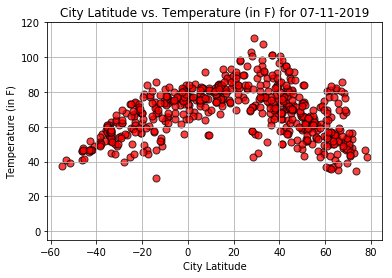

In [35]:
#Create a scatter plot
#Set latitude as X axis and Max Temperature as Y axis
plt.ylim(-5, 120)
plt.scatter(latitude, max_temperature, marker="o", facecolors="red", edgecolors="black",s=50, alpha=0.75)

#Add clarifying elements:
#Title
plt.title(f"City Latitude vs. Temperature (in F) for {today}")
plt.xlabel("City Latitude")
plt.ylabel("Temperature (in F)")
#Axis labels

#Gridlines
plt.grid(True)
#Save it
plt.savefig(f"LatitudevsTemperature{today}_JS.png")

plt.show()

## Analysis 2:

The data consistently show a curve with its apex skewed slightly north of the equator. This makes sense given that it is currently summer in the northern hemisphere. The subsolar point, or point closest to the sun in a direct line, is north of the equator. The variation among the points along the curve can be explained by time of day, elevation, and other weather elements (see below). 

#### Latitude vs. Humidity Plot

<function matplotlib.pyplot.show(*args, **kw)>

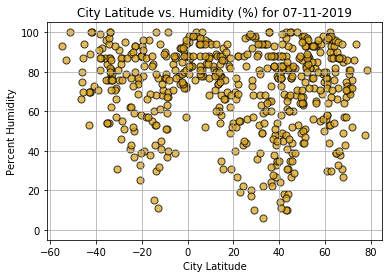

In [36]:
#Create a scatter plot
#Create a scatter plot
#Set latitude as X axis and humidity as Y axis
plt.ylim(-5, 105) #Json data had an issue and returned humidity levels of >100%
plt.scatter(latitude, humidity, marker="o", facecolors="goldenrod", edgecolors="black",s=50, alpha=0.75)

#Gridlines
plt.grid(True)
#Add clarifying elements:
#Title
plt.title(f"City Latitude vs. Humidity (%) for {today}")
plt.xlabel("City Latitude")
plt.ylabel("Percent Humidity")

plt.savefig(f"LatitudevsHumidity{today}_JS.png")
plt.show

## Analysis 3:

With the exception of a few weather reports that clearly had typos (humidity levels of nearly 300%), the data were fairly consistent: humidity levels of less than 60% were relatively rare overall and were slightly more rare in the southern hemisphere. This effect became more pronounced the father south of the equator a city was. This is likely due to a combination of factors (seasonal differences and relativlely small number of cities with populations of 500 or more in the southern hemisphere).

#### Latitude vs. Cloudiness Plot

<function matplotlib.pyplot.show(*args, **kw)>

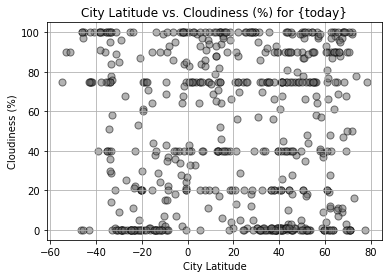

In [37]:
#Create a scatter plot
#Create a scatter plot
#Set latitude as X axis and Max Temperature as Y axis
plt.scatter(latitude, cloudiness, marker="o", facecolors="dimgray", edgecolors="black",s=50, alpha=0.5)

#Gridlines
plt.grid(True)
#Add clarifying elements:
#Title
plt.title("City Latitude vs. Cloudiness (%) for {today}")
plt.xlabel("City Latitude")
plt.ylabel("Cloudiness (%)")

plt.savefig(f"LatitudevsCloudiness{today}_JS.png")
plt.show

## Analysis 4:

This particular chart reveals a bit less about weather and a bit more about the way that we measure and report it. In the bulk of data sets that I examined, there were high concentrations of cloudiness at even intervals. This tells me that although a percentage is quantitative, the number reported is not necessarily precise. It seems likely that most weather reports include cloud cover numbers that are rounded to the nearest 5% or 10%. 

That said, many of the charts revealed slightly more instances of cloudiness in the northern hemisphere and a bit fewer in the southern hemisphere.

#### Latitude vs. Wind Speed Plot

<function matplotlib.pyplot.show(*args, **kw)>

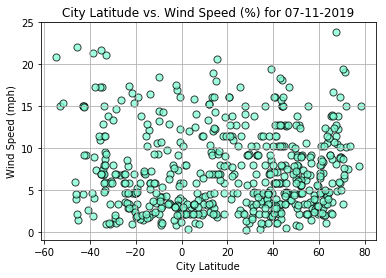

In [38]:
#Create a scatter plot
#Set latitude as X axis and Wind Speed as Y axis
plt.scatter(latitude, wind_speed, marker="o", facecolors="aquamarine", edgecolors="black",s=50, alpha=0.75)

#Gridlines
plt.grid(True)
#Add clarifying elements:
#Title
plt.title(f"City Latitude vs. Wind Speed (%) for {today}")
plt.xlabel("City Latitude")
plt.ylabel("Wind Speed (mph)")

plt.savefig(f"LatitudevsWindSpeed{today}_JS.png")

plt.show

## Analysis 5:

This chart primarily revealed that high wind speeds (over 25 miles an hour) are rare in cities that have more than 500 people. The vast majority of wind speeds are below 10 mph, and the number of instances of a particular speed decreases as the speed increases. 